In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib. pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [41]:
import tensorflow  as tf

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
from sklearn.preprocessing import MinMaxScaler,normalize,Normalizer,LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [5]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier

In [6]:
from keras.layers import Dense,Dropout
from keras.models import Sequential

In [7]:
data=pd.read_csv("/content/drive/MyDrive/kdd-d.csv",low_memory=False)

In [8]:
data.shape

(494020, 42)

In [9]:
data.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'lnum_compromised', 'lroot_shell',
       'lsu_attempted', 'lnum_root', 'lnum_file_creations', 'lnum_shells',
       'lnum_access_files', 'lnum_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'label'],
      dtype='object')

In [10]:
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,lnum_compromised,lroot_shell,lsu_attempted,lnum_root,lnum_file_creations,lnum_shells,lnum_access_files,lnum_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,181,5450,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,9,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal
1,0,tcp,http,SF,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,19,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,29,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,39,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,49,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494020 entries, 0 to 494019
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     494020 non-null  int64  
 1   protocol_type                494020 non-null  object 
 2   service                      494020 non-null  object 
 3   flag                         494020 non-null  object 
 4   src_bytes                    494020 non-null  int64  
 5   dst_bytes                    494020 non-null  int64  
 6   land                         494020 non-null  int64  
 7   wrong_fragment               494020 non-null  int64  
 8   urgent                       494020 non-null  int64  
 9   hot                          494020 non-null  int64  
 10  num_failed_logins            494020 non-null  int64  
 11  logged_in                    494020 non-null  int64  
 12  lnum_compromised             494020 non-null  int64  
 13 

In [12]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
duration,494020.0,47.979400,707.747185,0.0,0.00,0.0,0.00,58329.0
src_bytes,494020.0,3025.615744,988219.101230,0.0,45.00,520.0,1032.00,693375640.0
dst_bytes,494020.0,868.530774,33040.034672,0.0,0.00,0.0,0.00,5155468.0
land,494020.0,0.000045,0.006673,0.0,0.00,0.0,0.00,1.0
wrong_fragment,494020.0,0.006433,0.134805,0.0,0.00,0.0,0.00,3.0
urgent,494020.0,0.000014,0.005510,0.0,0.00,0.0,0.00,3.0
hot,494020.0,0.034519,0.782103,0.0,0.00,0.0,0.00,30.0
num_failed_logins,494020.0,0.000152,0.015520,0.0,0.00,0.0,0.00,5.0
logged_in,494020.0,0.148245,0.355343,0.0,0.00,0.0,0.00,1.0
lnum_compromised,494020.0,0.010212,1.798328,0.0,0.00,0.0,0.00,884.0


In [13]:
data.isna().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
lnum_compromised               0
lroot_shell                    0
lsu_attempted                  0
lnum_root                      0
lnum_file_creations            0
lnum_shells                    0
lnum_access_files              0
lnum_outbound_cmds             0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

label

In [14]:
data["label"].unique()

array(['normal', 'buffer_overflow', 'loadmodule', 'perl', 'neptune',
       'smurf', 'guess_passwd', 'pod', 'teardrop', 'portsweep', 'ipsweep',
       'land', 'ftp_write', 'back', 'imap', 'satan', 'phf', 'nmap',
       'multihop', 'warezmaster', 'warezclient', 'spy', 'rootkit'],
      dtype=object)

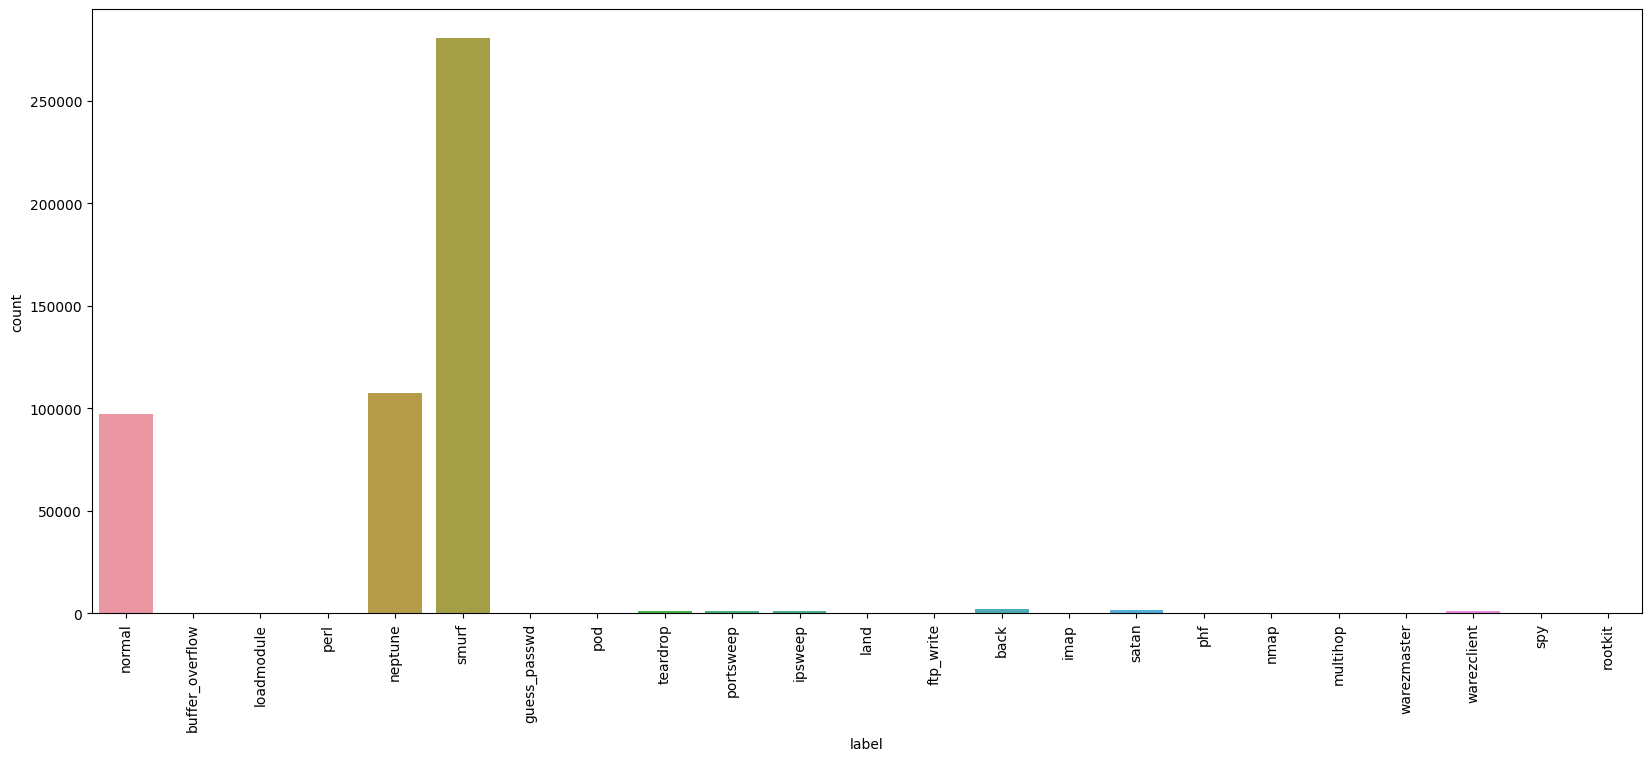

In [15]:
plt.figure(figsize=(20,8),dpi=100)
sb.countplot(data.label)
plt.xticks(rotation=90)
plt.show();

In [16]:
data.loc[(data['label'].isin(['back','land','neptune','pod','smurf','teardrop'])),'label_type']='DOS'
data.loc[data['label'].isin(['ipsweep','nmap','portsweep','satan']),'label_type']='Probing'
data.loc[data['label'].isin(['ftp_write','guess_passwd','imap','multihop','phf','spy','warezclient','warezmaster']),'label_type']='R2L'
data.loc[data['label'].isin(['buffer_overflow','loadmodule','perl','rootkit']),'label_type']='U2R'
data.loc[data['label']=='normal','label_type']='Normal'

In [17]:
data.label_type.value_counts(normalize=True)

DOS        0.792393
Normal     0.196909
Probing    0.008313
R2L        0.002279
U2R        0.000105
Name: label_type, dtype: float64

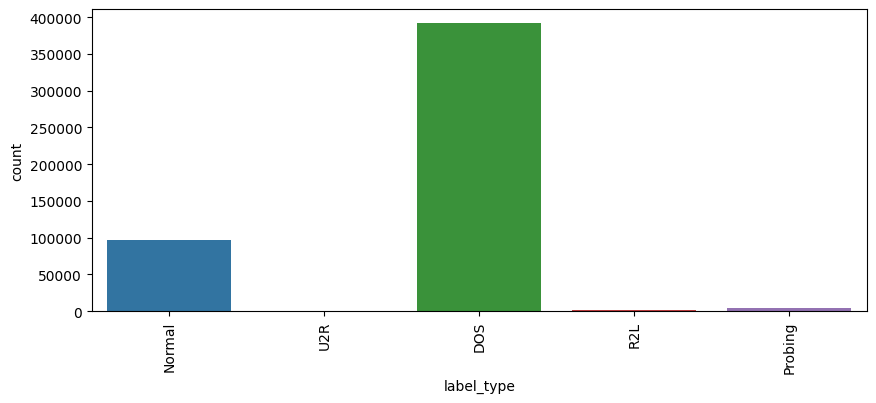

In [18]:
plt.figure(figsize=(10,4),dpi=100)
sb.countplot(data.label_type)
plt.xticks(rotation=90)
plt.show();

In [19]:
data.drop("label",axis=1, inplace=True)

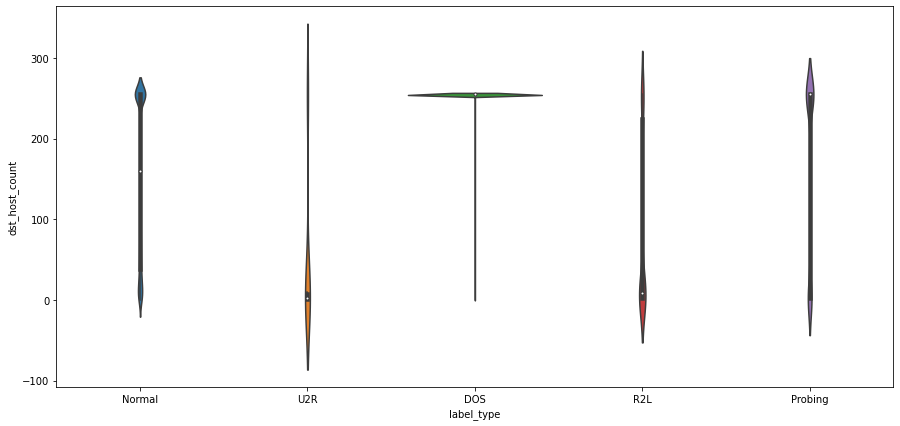

In [ ]:
plt.figure(figsize=(15,7))
sb.violinplot(x="label_type",y="dst_host_count",data=data)

### features

In [ ]:
data["protocol_type"].value_counts()


icmp    283602
tcp     190064
udp      20354
Name: protocol_type, dtype: int64

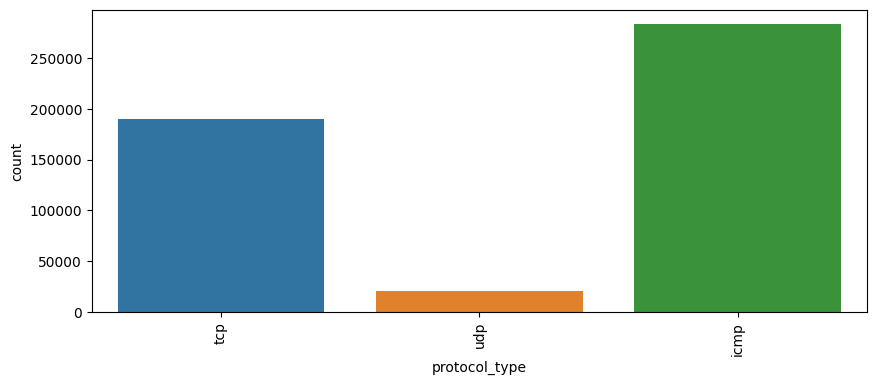

In [ ]:
plt.figure(figsize=(10,4),dpi=100)
sb.countplot(data.protocol_type)
plt.xticks(rotation=90)
plt.show();

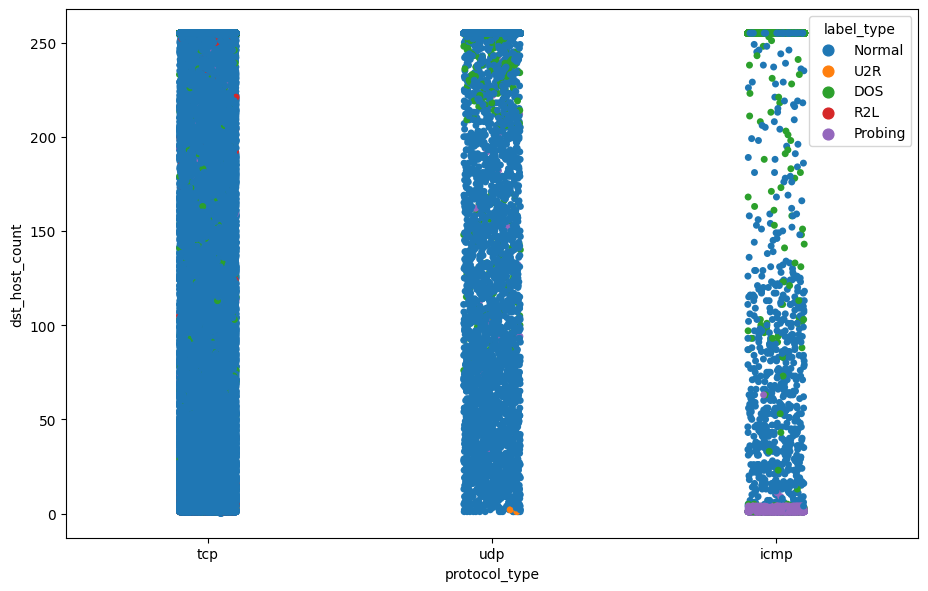

In [ ]:
plt.figure(figsize=(11,7),dpi=100)
sb.stripplot(x='protocol_type',y="dst_host_count",hue="label_type",data=data)

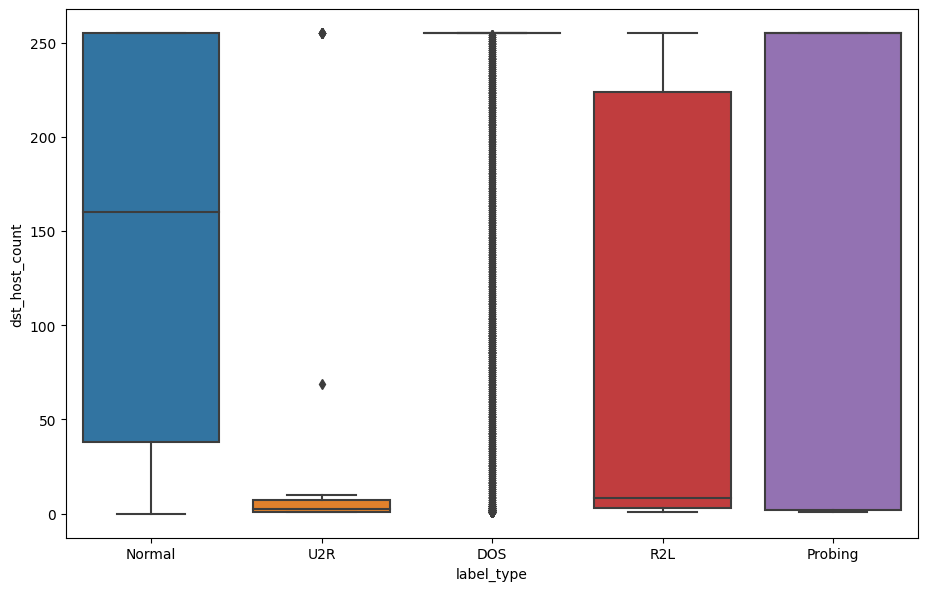

In [ ]:
plt.figure(figsize=(11,7),dpi=100)
sb.boxplot(x='label_type',y="dst_host_count",data=data)

Text(0.5, 1.0, 'srv_serror_rate Vs dst_host_counts')

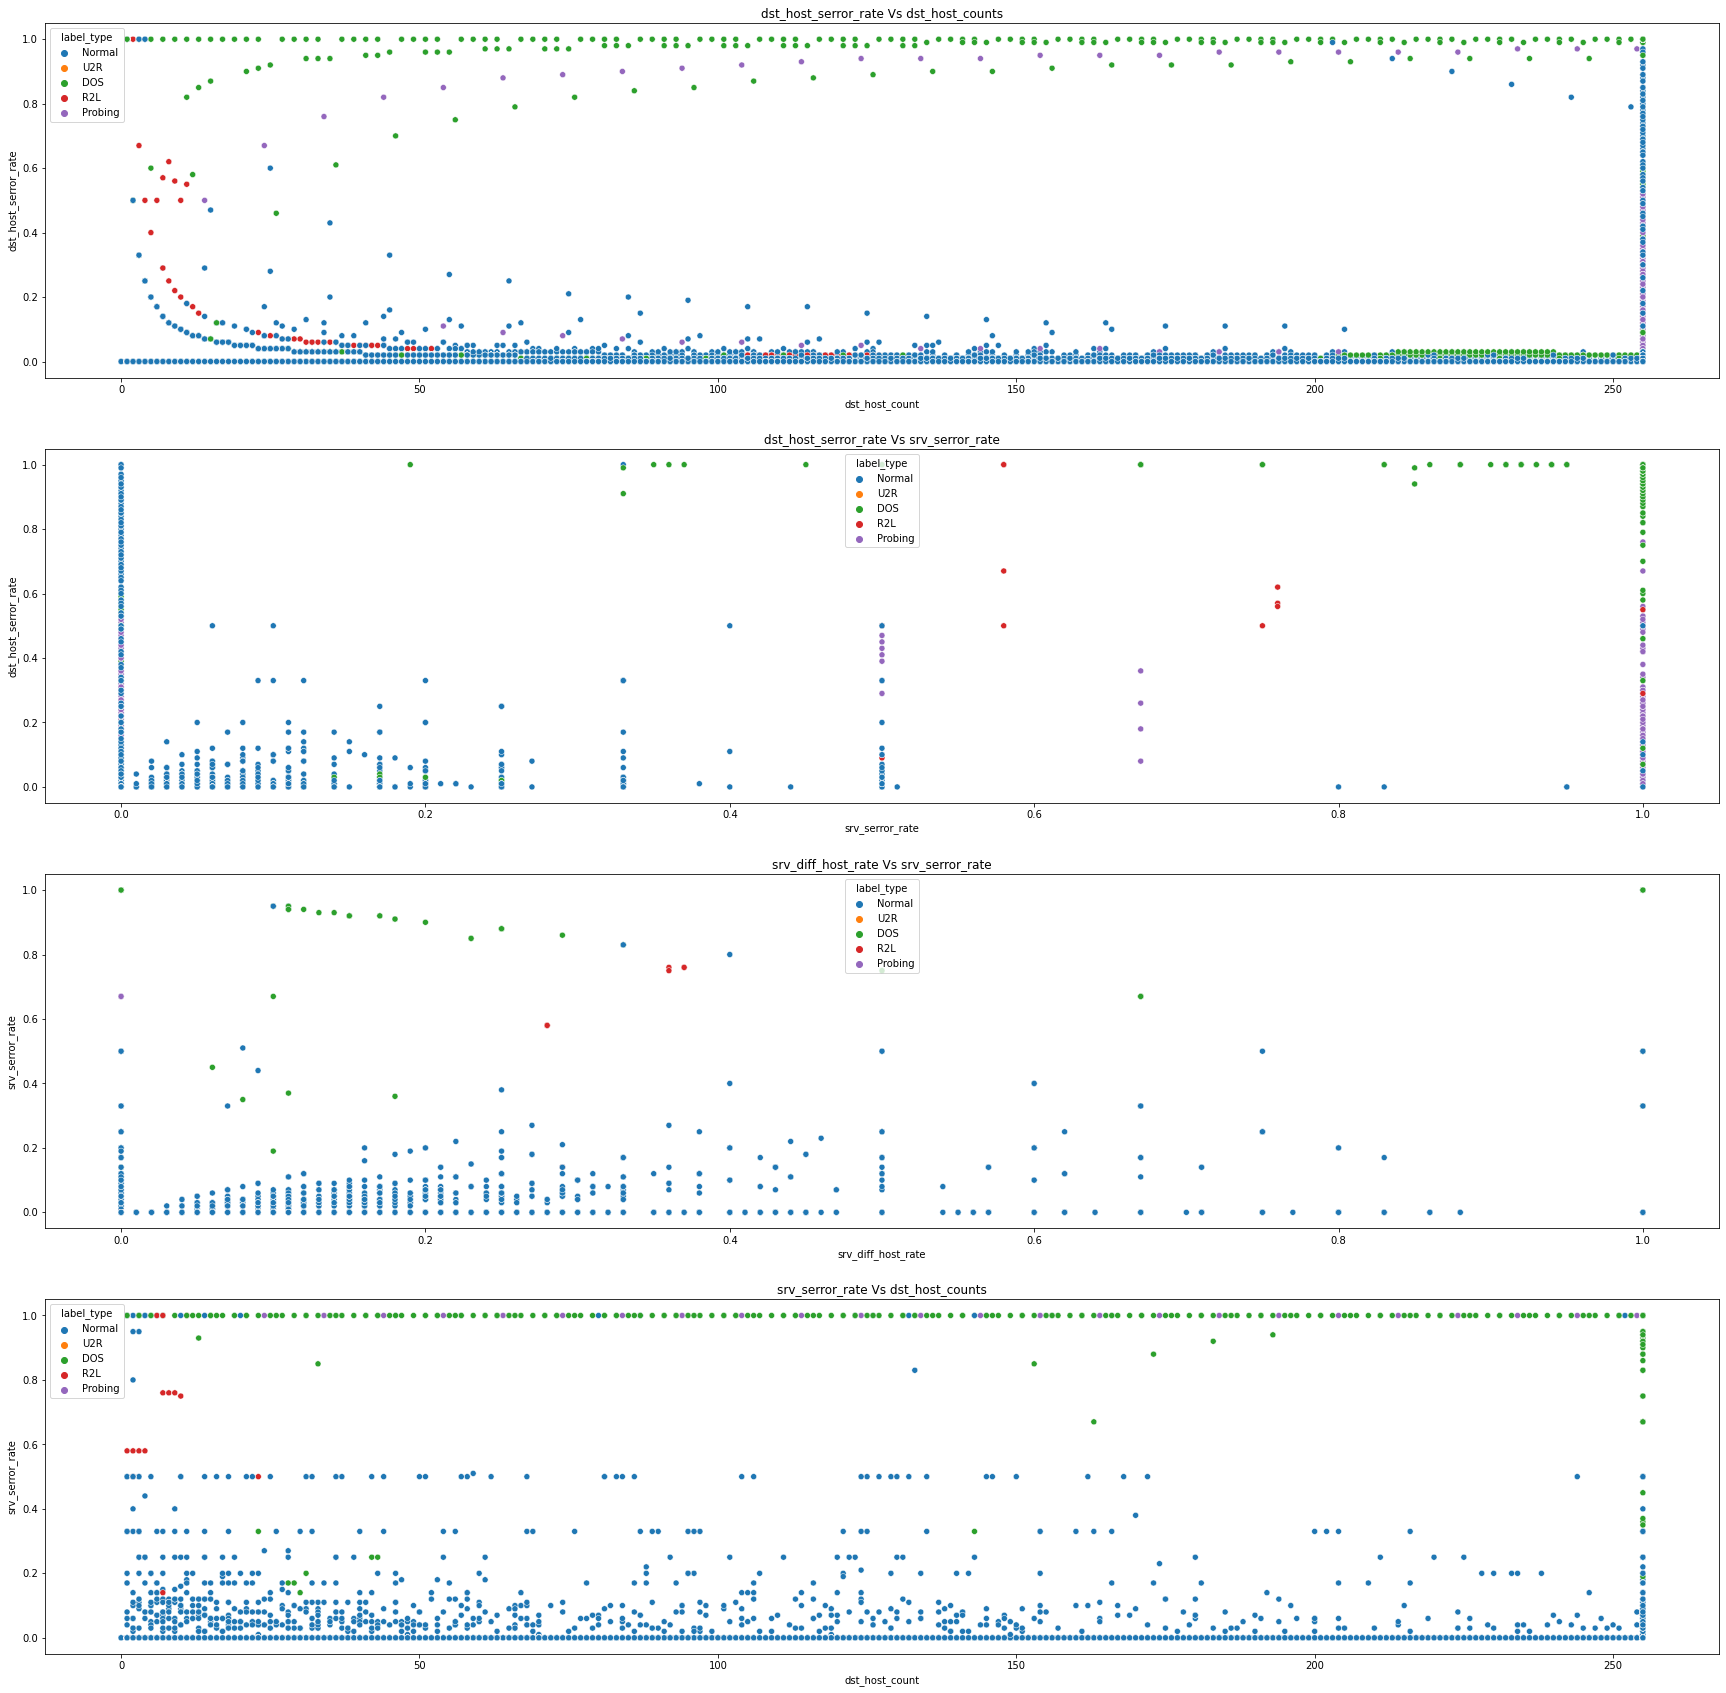

In [ ]:
plt.figure(figsize=(30,30))
plt.subplot(411)
sb.scatterplot(x="dst_host_count",y="dst_host_serror_rate",hue="label_type",data=data)
plt.title("dst_host_serror_rate Vs dst_host_counts")

plt.subplot(412)
sb.scatterplot(x="srv_serror_rate",y="dst_host_serror_rate",hue="label_type",data=data)
plt.title("dst_host_serror_rate Vs srv_serror_rate")


plt.subplot(413)
sb.scatterplot(x="srv_diff_host_rate",y="srv_serror_rate",hue="label_type",data=data)
plt.title("srv_diff_host_rate Vs srv_serror_rate")

plt.subplot(414)
sb.scatterplot(x="dst_host_count",y="srv_serror_rate",hue="label_type",data=data)
plt.title("srv_serror_rate Vs dst_host_counts")


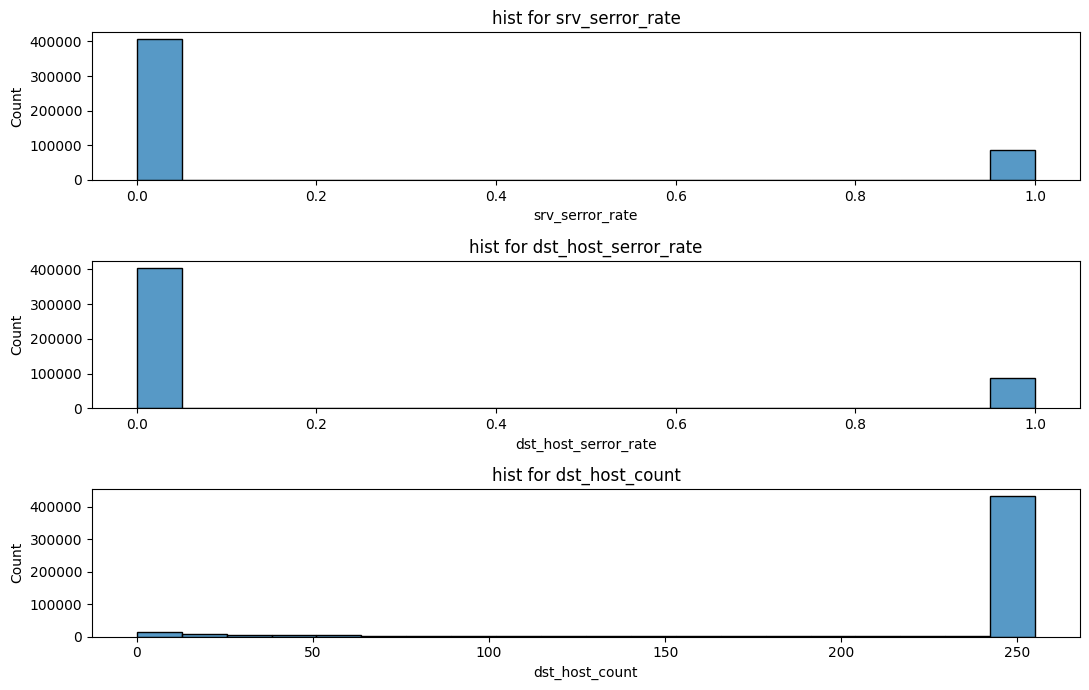

In [ ]:
plt.figure(figsize=(11,7),dpi=100)
plt.subplot(311)
sb.histplot(data["srv_serror_rate"])
plt.title("hist for srv_serror_rate")
plt.subplot(312)
sb.histplot(data['dst_host_serror_rate'])
plt.title("hist for dst_host_serror_rate")
plt.subplot(313)
sb.histplot(data['dst_host_count'])
plt.title("hist for dst_host_count")
plt.tight_layout()

In [20]:
data.service.value_counts()

ecr_i      281400
private    110893
http        64292
smtp         9723
other        7237
            ...  
X11            11
tim_i           7
pm_dump         1
red_i           1
tftp_u          1
Name: service, Length: 66, dtype: int64

In [21]:
len(data.service.unique())

66

In [22]:
data.flag.value_counts()

SF        378439
S0         87007
REJ        26875
RSTR         903
RSTO         579
SH           107
S1            57
S2            24
RSTOS0        11
S3            10
OTH            8
Name: flag, dtype: int64

In [23]:
data=pd.get_dummies(data,prefix=['protocol_type'], columns = ['protocol_type'], drop_first=True)
data=pd.get_dummies(data,prefix=['service'], columns = ['service'], drop_first=True)
data=pd.get_dummies(data,prefix=['flag'], columns = ['flag'], drop_first=True)

In [24]:
data.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,lnum_compromised,lroot_shell,lsu_attempted,lnum_root,lnum_file_creations,lnum_shells,lnum_access_files,lnum_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label_type,protocol_type_tcp,...,service_netstat,service_nnsp,service_nntp,service_ntp_u,service_other,service_pm_dump,service_pop_2,service_pop_3,service_printer,service_private,service_red_i,service_remote_job,service_rje,service_shell,service_smtp,service_sql_net,service_ssh,service_sunrpc,service_supdup,service_systat,service_telnet,service_tftp_u,service_tim_i,service_time,service_urh_i,service_urp_i,service_uucp,service_uucp_path,service_vmnet,service_whois,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,181,5450,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,9,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,Normal,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,19,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,Normal,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,235,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,29,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,Normal,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,219,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,39,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,Normal,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,49,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,Normal,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


### train_test_split and LabelEncoders

In [91]:
x=data.drop("label_type",axis=1)
y=data.label_type

In [92]:
le=LabelEncoder()
y_ml=le.fit_transform(y)

In [93]:
y_ml=y_ml.reshape(-1,1)

In [97]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y_ml,test_size=0.25,random_state=42)

In [98]:
print("xtrain shape is",xtrain.shape)
print("ytrain shape is",ytrain.shape,'\n')
print("xtest shape is",xtest.shape)
print("ytest shape is",ytest.shape)

xtrain shape is (370515, 115)
ytrain shape is (370515, 1) 

xtest shape is (123505, 115)
ytest shape is (123505, 1)


### normalizetion

In [99]:
normalizer=Normalizer()
xtrain_norm=normalizer.fit_transform(xtrain.values)
xtest_norm=normalizer.transform(xtest.values)

In [100]:
##models

In [101]:
#Machine Learning Algorithms
lr=LogisticRegression(random_state=42)
nb = GaussianNB()
dt=DecisionTreeClassifier(criterion="entropy",max_depth=5,random_state=42)
dt_gini=DecisionTreeClassifier(criterion="gini",max_depth=5,random_state=42)
rf=RandomForestClassifier(n_estimators=100,max_depth=5,random_state=42)
rf_entropy=RandomForestClassifier(criterion="entropy",n_estimators=100,max_depth=5,random_state=42)
ad=AdaBoostClassifier(n_estimators=50,random_state=42)
model_list=[lr,nb,dt,dt_gini,rf,rf_entropy,ad]

train score:  0.9814906279098012 and test score is:  0.9813286911461074

               precision    recall  f1-score   support

           0       0.99      0.99      0.99     97867
           1       0.95      0.99      0.97     24282
           2       0.75      0.07      0.13      1042
           3       0.00      0.00      0.00       296
           4       0.00      0.00      0.00        18

    accuracy                           0.98    123505
   macro avg       0.54      0.41      0.42    123505
weighted avg       0.98      0.98      0.98    123505
 



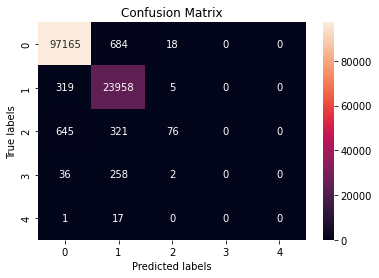


*_* *_* *_* *_* *_* *_* *_* *_* *_* *_* 

train score:  0.9526173029432007 and test score is:  0.9529897574996964

               precision    recall  f1-score   support

           0       1.00      0.98      0.99     97867
           1       0.98      0.84      0.90     24282
           2       0.43      0.68      0.53      1042
           3       0.33      0.87      0.48       296
           4       0.00      0.89      0.01        18

    accuracy                           0.95    123505
   macro avg       0.55      0.85      0.58    123505
weighted avg       0.99      0.95      0.97    123505
 



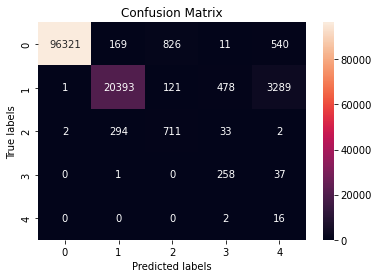


*_* *_* *_* *_* *_* *_* *_* *_* *_* *_* 

train score:  0.9930394181072292 and test score is:  0.9922027448281446

               precision    recall  f1-score   support

           0       1.00      1.00      1.00     97867
           1       0.97      1.00      0.98     24282
           2       1.00      0.34      0.51      1042
           3       0.83      0.82      0.82       296
           4       0.00      0.00      0.00        18

    accuracy                           0.99    123505
   macro avg       0.76      0.63      0.66    123505
weighted avg       0.99      0.99      0.99    123505
 



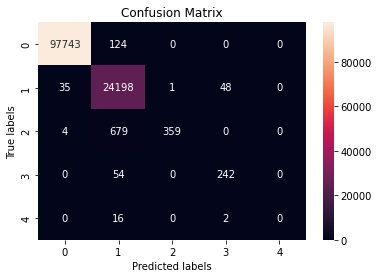


*_* *_* *_* *_* *_* *_* *_* *_* *_* *_* 

train score:  0.99652915536483 and test score is:  0.9961944860531963

               precision    recall  f1-score   support

           0       1.00      1.00      1.00     97867
           1       0.98      1.00      0.99     24282
           2       0.99      0.93      0.96      1042
           3       0.00      0.00      0.00       296
           4       0.75      0.33      0.46        18

    accuracy                           1.00    123505
   macro avg       0.74      0.65      0.68    123505
weighted avg       0.99      1.00      0.99    123505
 



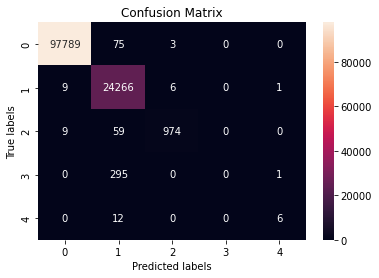


*_* *_* *_* *_* *_* *_* *_* *_* *_* *_* 

train score:  0.9960487429658719 and test score is:  0.9957977409821465

               precision    recall  f1-score   support

           0       1.00      1.00      1.00     97867
           1       0.98      1.00      0.99     24282
           2       1.00      0.82      0.90      1042
           3       1.00      0.01      0.03       296
           4       0.00      0.00      0.00        18

    accuracy                           1.00    123505
   macro avg       0.80      0.57      0.58    123505
weighted avg       1.00      1.00      0.99    123505
 



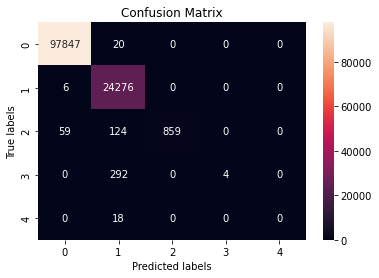


*_* *_* *_* *_* *_* *_* *_* *_* *_* *_* 

train score:  0.9958706125258087 and test score is:  0.9955791263511599

               precision    recall  f1-score   support

           0       1.00      1.00      1.00     97867
           1       0.98      1.00      0.99     24282
           2       1.00      0.81      0.90      1042
           3       0.00      0.00      0.00       296
           4       0.00      0.00      0.00        18

    accuracy                           1.00    123505
   macro avg       0.60      0.56      0.58    123505
weighted avg       0.99      1.00      0.99    123505
 



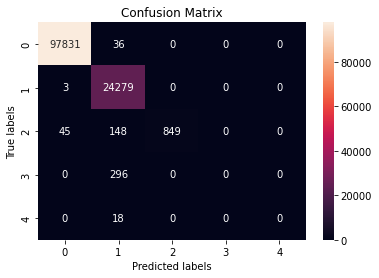


*_* *_* *_* *_* *_* *_* *_* *_* *_* *_* 

train score:  0.8852678029229586 and test score is:  0.8859155499777337

               precision    recall  f1-score   support

           0       0.99      0.99      0.99     97867
           1       0.87      0.51      0.64     24282
           2       0.00      0.00      0.00      1042
           3       0.01      0.28      0.01       296
           4       0.00      0.00      0.00        18

    accuracy                           0.89    123505
   macro avg       0.37      0.36      0.33    123505
weighted avg       0.96      0.89      0.91    123505
 



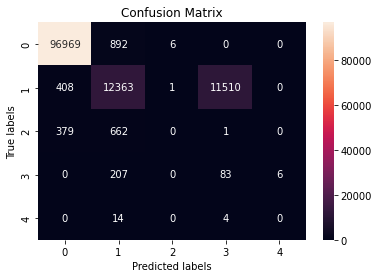


*_* *_* *_* *_* *_* *_* *_* *_* *_* *_* 



In [102]:
train_list=list()
test_list=list()
for model in model_list:
    model.fit(xtrain_norm,ytrain)
    train_score=model.score(xtrain_norm,ytrain)
    test_score=model.score(xtest_norm,ytest)
    print("train score: ",train_score,"and test score is: ",test_score)
    test_list.append(test_score)
    train_list.append(train_score)
    predict_test=model.predict(xtest_norm)
    print('\n',classification_report(ytest,predict_test),'\n')
    cm=confusion_matrix(ytest,predict_test)
    ax= plt.subplot()
    sb.heatmap(cm, annot=True, fmt='g', ax=ax);
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
    ax.set_title('Confusion Matrix');
    plt.show()
    print('\n'+10*"*_* "+'\n')

In [103]:
model_name=["lr","nb","dt","dt_gini","rf","rf_entropy","ad"]
score_df=pd.DataFrame(data=[train_list,test_list],index=["train_scores","test_scores"],columns=model_name).transpose()

In [104]:
score_df

,train_scores,test_scores
lr,0.981491,0.981329
nb,0.952617,0.952990
dt,0.993039,0.992203
dt_gini,0.996529,0.996194
rf,0.996049,0.995798
rf_entropy,0.995871,0.995579
ad,0.885268,0.885916


In [108]:
y_deep=pd.get_dummies(y).values

In [110]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y_deep,test_size=0.25,random_state=42)

In [111]:
print("xtrain shape is",xtrain.shape)
print("ytrain shape is",ytrain.shape,'\n')
print("xtest shape is",xtest.shape)
print("ytest shape is",ytest.shape)

xtrain shape is (370515, 115)
ytrain shape is (370515, 5) 

xtest shape is (123505, 115)
ytest shape is (123505, 5)


In [112]:
normalizer=Normalizer()
xtrain_norm=normalizer.fit_transform(xtrain.values)
xtest_norm=normalizer.transform(xtest.values)

In [113]:
dnn=Sequential()
dnn.add(Dense(115,activation="relu"))
dnn.add(Dropout(0.3))
dnn.add(Dense(50, activation="relu"))
dnn.add(Dropout(0.01))  
dnn.add(Dense(500,activation='relu'))  
dnn.add(Dense(250,activation='relu'))  
dnn.add(Dropout(0.1))
dnn.add(Dense(100,activation='relu'))  
dnn.add(Dropout(0.2))
dnn.add(Dense(5,activation='softmax'))

In [114]:
dnn.compile(optimizer='adam',loss=tf.keras.losses.CategoricalCrossentropy(),metrics=["accuracy"])

In [116]:
dnn.fit(xtrain_norm,ytrain,batch_size=64,epochs=20,shuffle = True)


Epoch 1/20
5790/5790 [==============================] - 43s 7ms/step - loss: 0.0123 - accuracy: 0.9968
Epoch 2/20
5790/5790 [==============================] - 43s 7ms/step - loss: 0.0115 - accuracy: 0.9971
Epoch 3/20
5790/5790 [==============================] - 43s 7ms/step - loss: 0.0109 - accuracy: 0.9971
Epoch 4/20
5790/5790 [==============================] - 43s 7ms/step - loss: 0.0102 - accuracy: 0.9974
Epoch 5/20
5790/5790 [==============================] - 44s 8ms/step - loss: 0.0096 - accuracy: 0.9975
Epoch 6/20
5790/5790 [==============================] - 43s 8ms/step - loss: 0.0094 - accuracy: 0.9976
Epoch 7/20
5790/5790 [==============================] - 43s 7ms/step - loss: 0.0095 - accuracy: 0.9977
Epoch 8/20
5790/5790 [==============================] - 43s 7ms/step - loss: 0.0092 - accuracy: 0.9976
Epoch 9/20
5790/5790 [==============================] - 43s 8ms/step - loss: 0.0091 - accuracy: 0.9977
Epoch 10/20
5790/5790 [==============================] - 43s 7ms/step - l

In [118]:
dnn.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_31 (Dense)            (None, 115)               13340     
                                                                 
 dropout_21 (Dropout)        (None, 115)               0         
                                                                 
 dense_32 (Dense)            (None, 50)                5800      
                                                                 
 dropout_22 (Dropout)        (None, 50)                0         
                                                                 
 dense_33 (Dense)            (None, 500)               25500     
                                                                 
 dense_34 (Dense)            (None, 250)               125250    
                                                                 
 dropout_23 (Dropout)        (None, 250)              

In [120]:
y_pred_dnn=dnn.predict(xtest_norm)
train_score=dnn.evaluate(xtrain_norm,ytrain)
test_score=dnn.evaluate(xtest_norm,ytest)
print("train score: ",train_score[1],"and test score is: ",test_score[1])


3860/3860 [==============================] - 8s 2ms/step - loss: 0.0097 - accuracy: 0.9988
train score:  0.9988583326339722 and test score is:  0.9987854957580566


In [121]:
score_df

,train_scores,test_scores
lr,0.981491,0.981329
nb,0.952617,0.952990
dt,0.993039,0.992203
dt_gini,0.996529,0.996194
rf,0.996049,0.995798
rf_entropy,0.995871,0.995579
ad,0.885268,0.885916
